# BASEBALL CASE STUDY

## Importing Libreries

In [297]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing neccessory libreries

In [298]:
#Import the dataset

df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Importing the dataset and see all columns with first five rows.

###### In advertising sales dataset 
###### Input variables are : R,	AB,	H,	2B,	3B,	HR,	BB,	SO,	SB,	RA,	ER,	ERA, CG, SHO, SV, E
###### Target variable is : W

## Shape of data with number of rows and columns 

In [299]:
df.shape

(30, 17)

There are 30 Rows and 17 Columns in dataset

## Detailed description

In [300]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value.

## Datatypes of all columns 

In [301]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

all columns are having integer data types accept ERA column. ERA column is having floating data type.

## Checking is there any null value 

In [302]:
#check is there any null value present in any column

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no missing value in whole dataset.
As we see no null values present, it's safe to proceed.

In [303]:
df.loc[df['W']== " "]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


 As we see there are no missing or spaces are available in target variable.

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

#### 1. Distplot

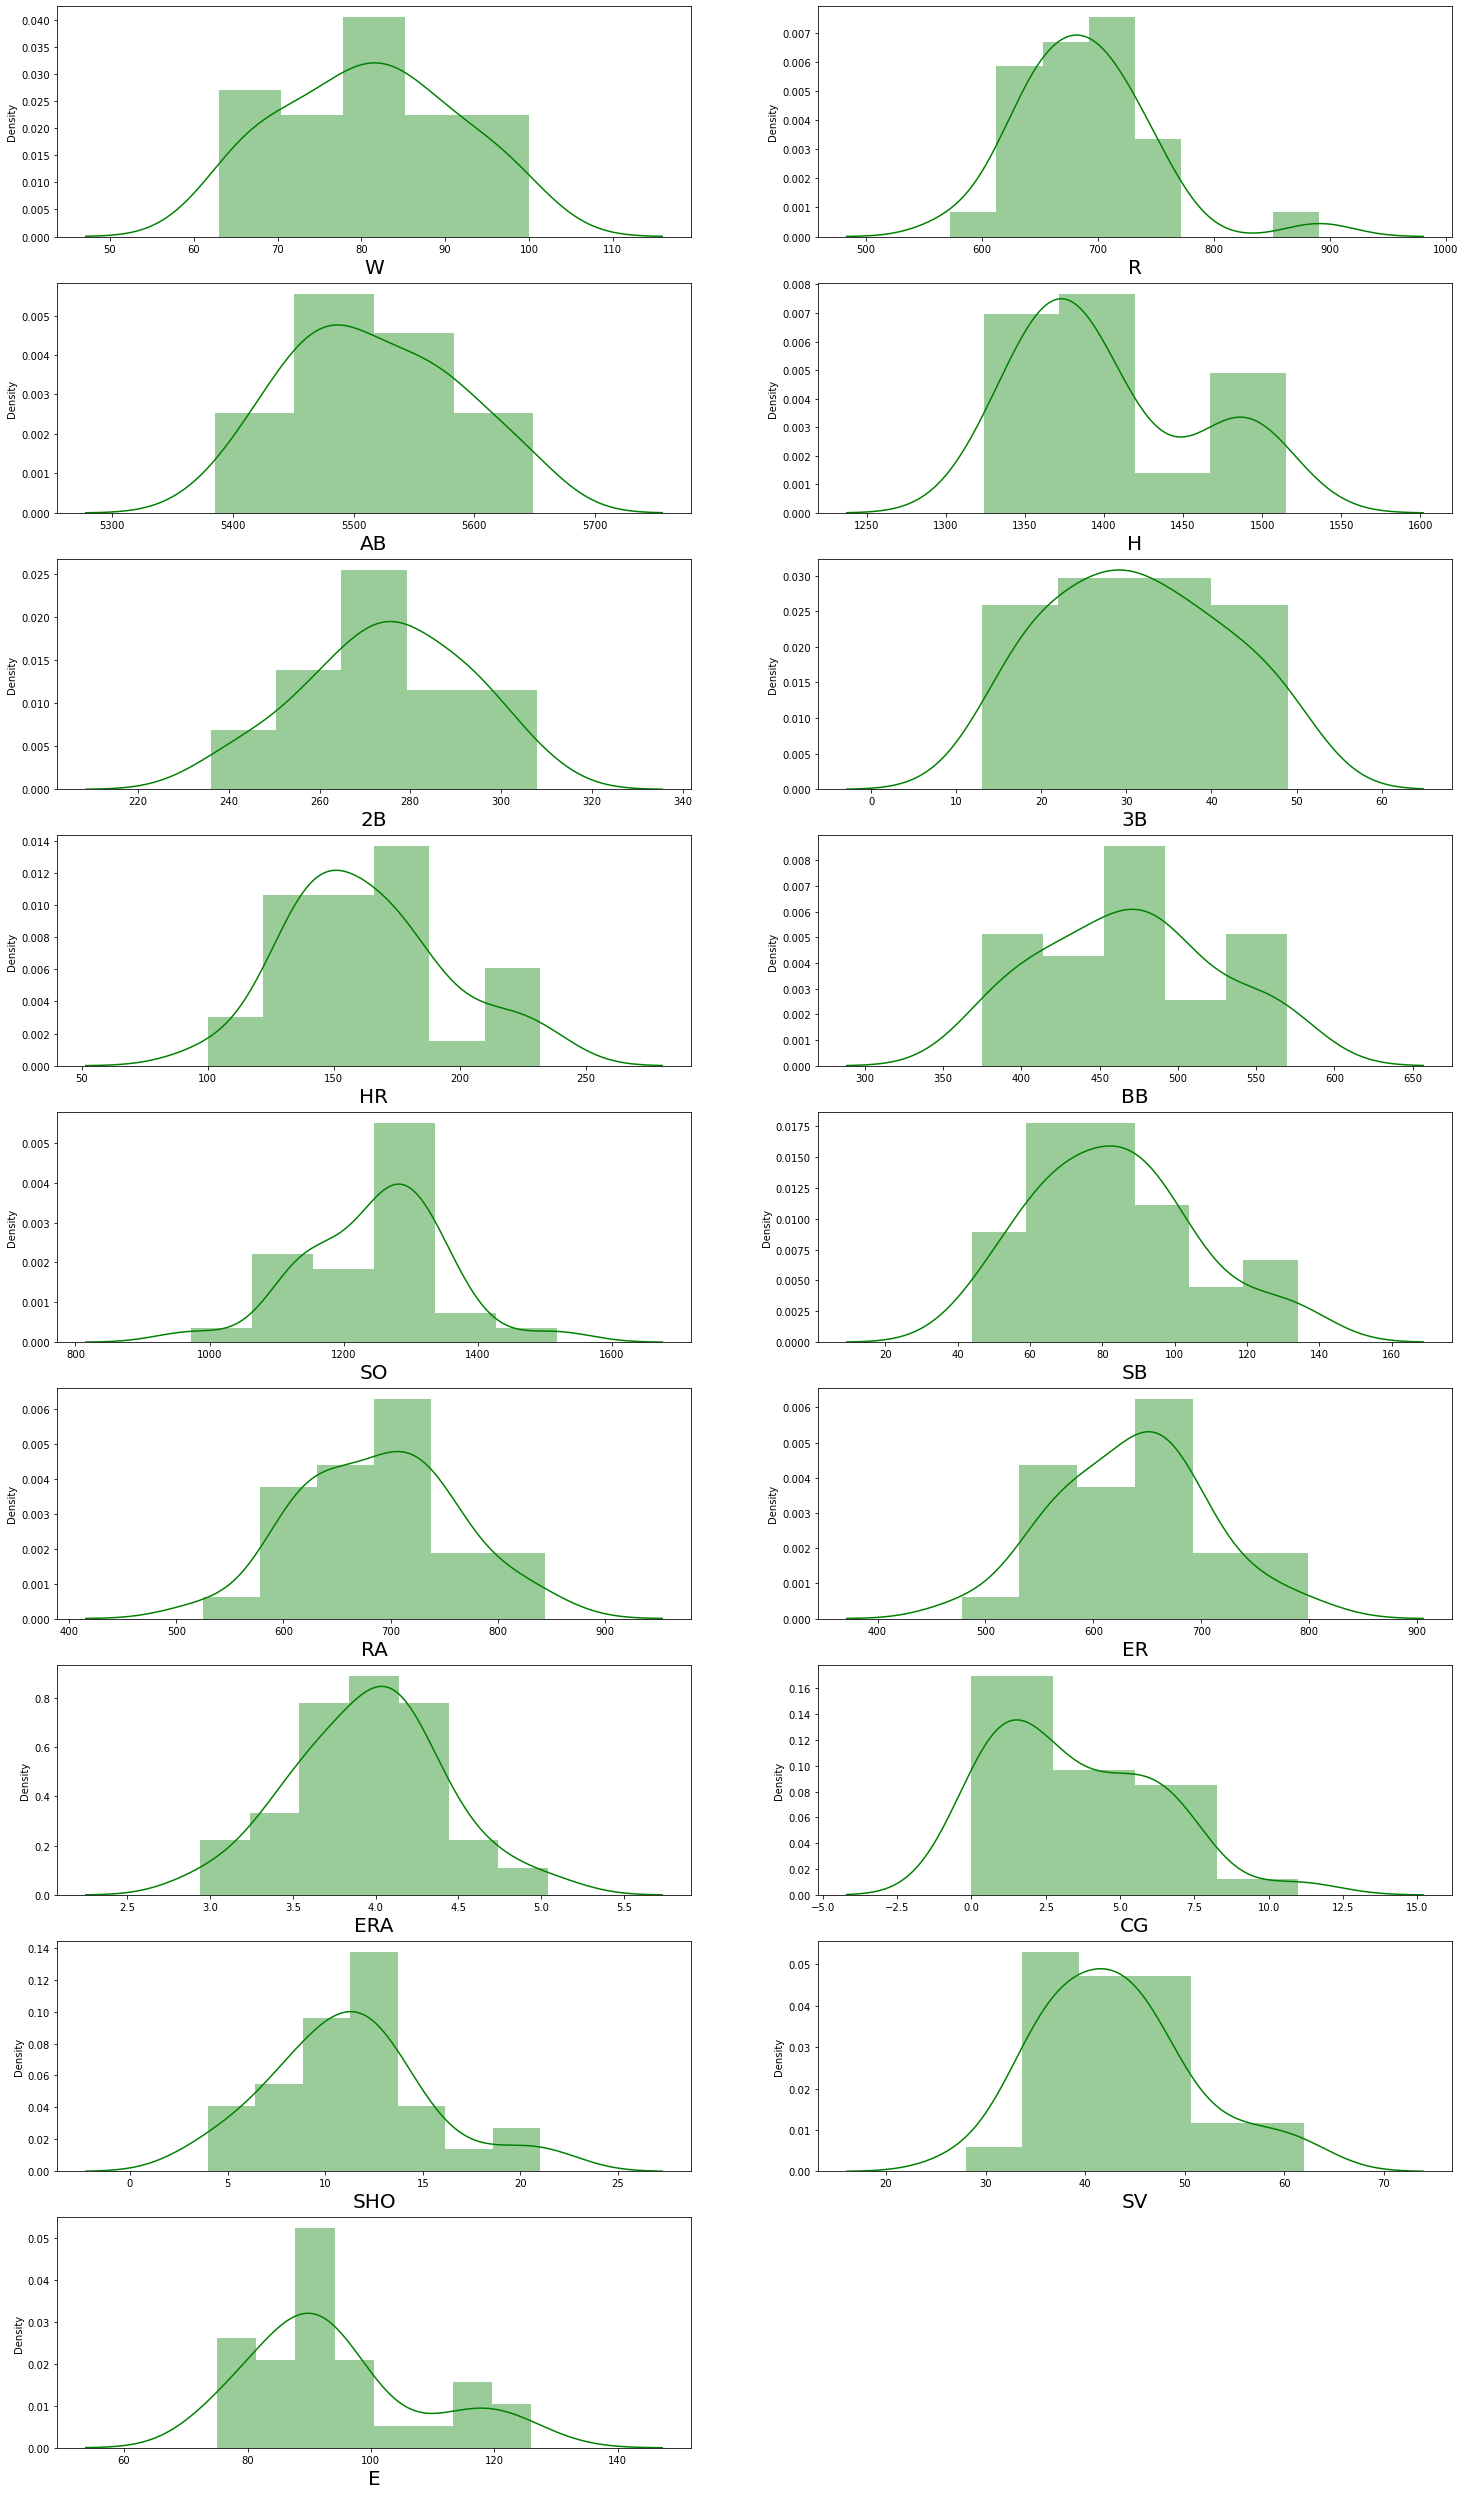

In [304]:
#Relationship Visualizing

plt.figure(figsize = (25,50), facecolor = 'white')
eda = 1

for column in df:
    if eda <= 20: # as we see there are eight columns in the data
        ax = plt.subplot(10,2,eda)
        sn.distplot(df[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    eda += 1
plt.show()

As shown in distplot R, ERA, SHO and E input variable is having slight skewness in it.other Data columns are almost normally distributed. So, we need remove skewness from that the input variable.

#### 2. Histplot

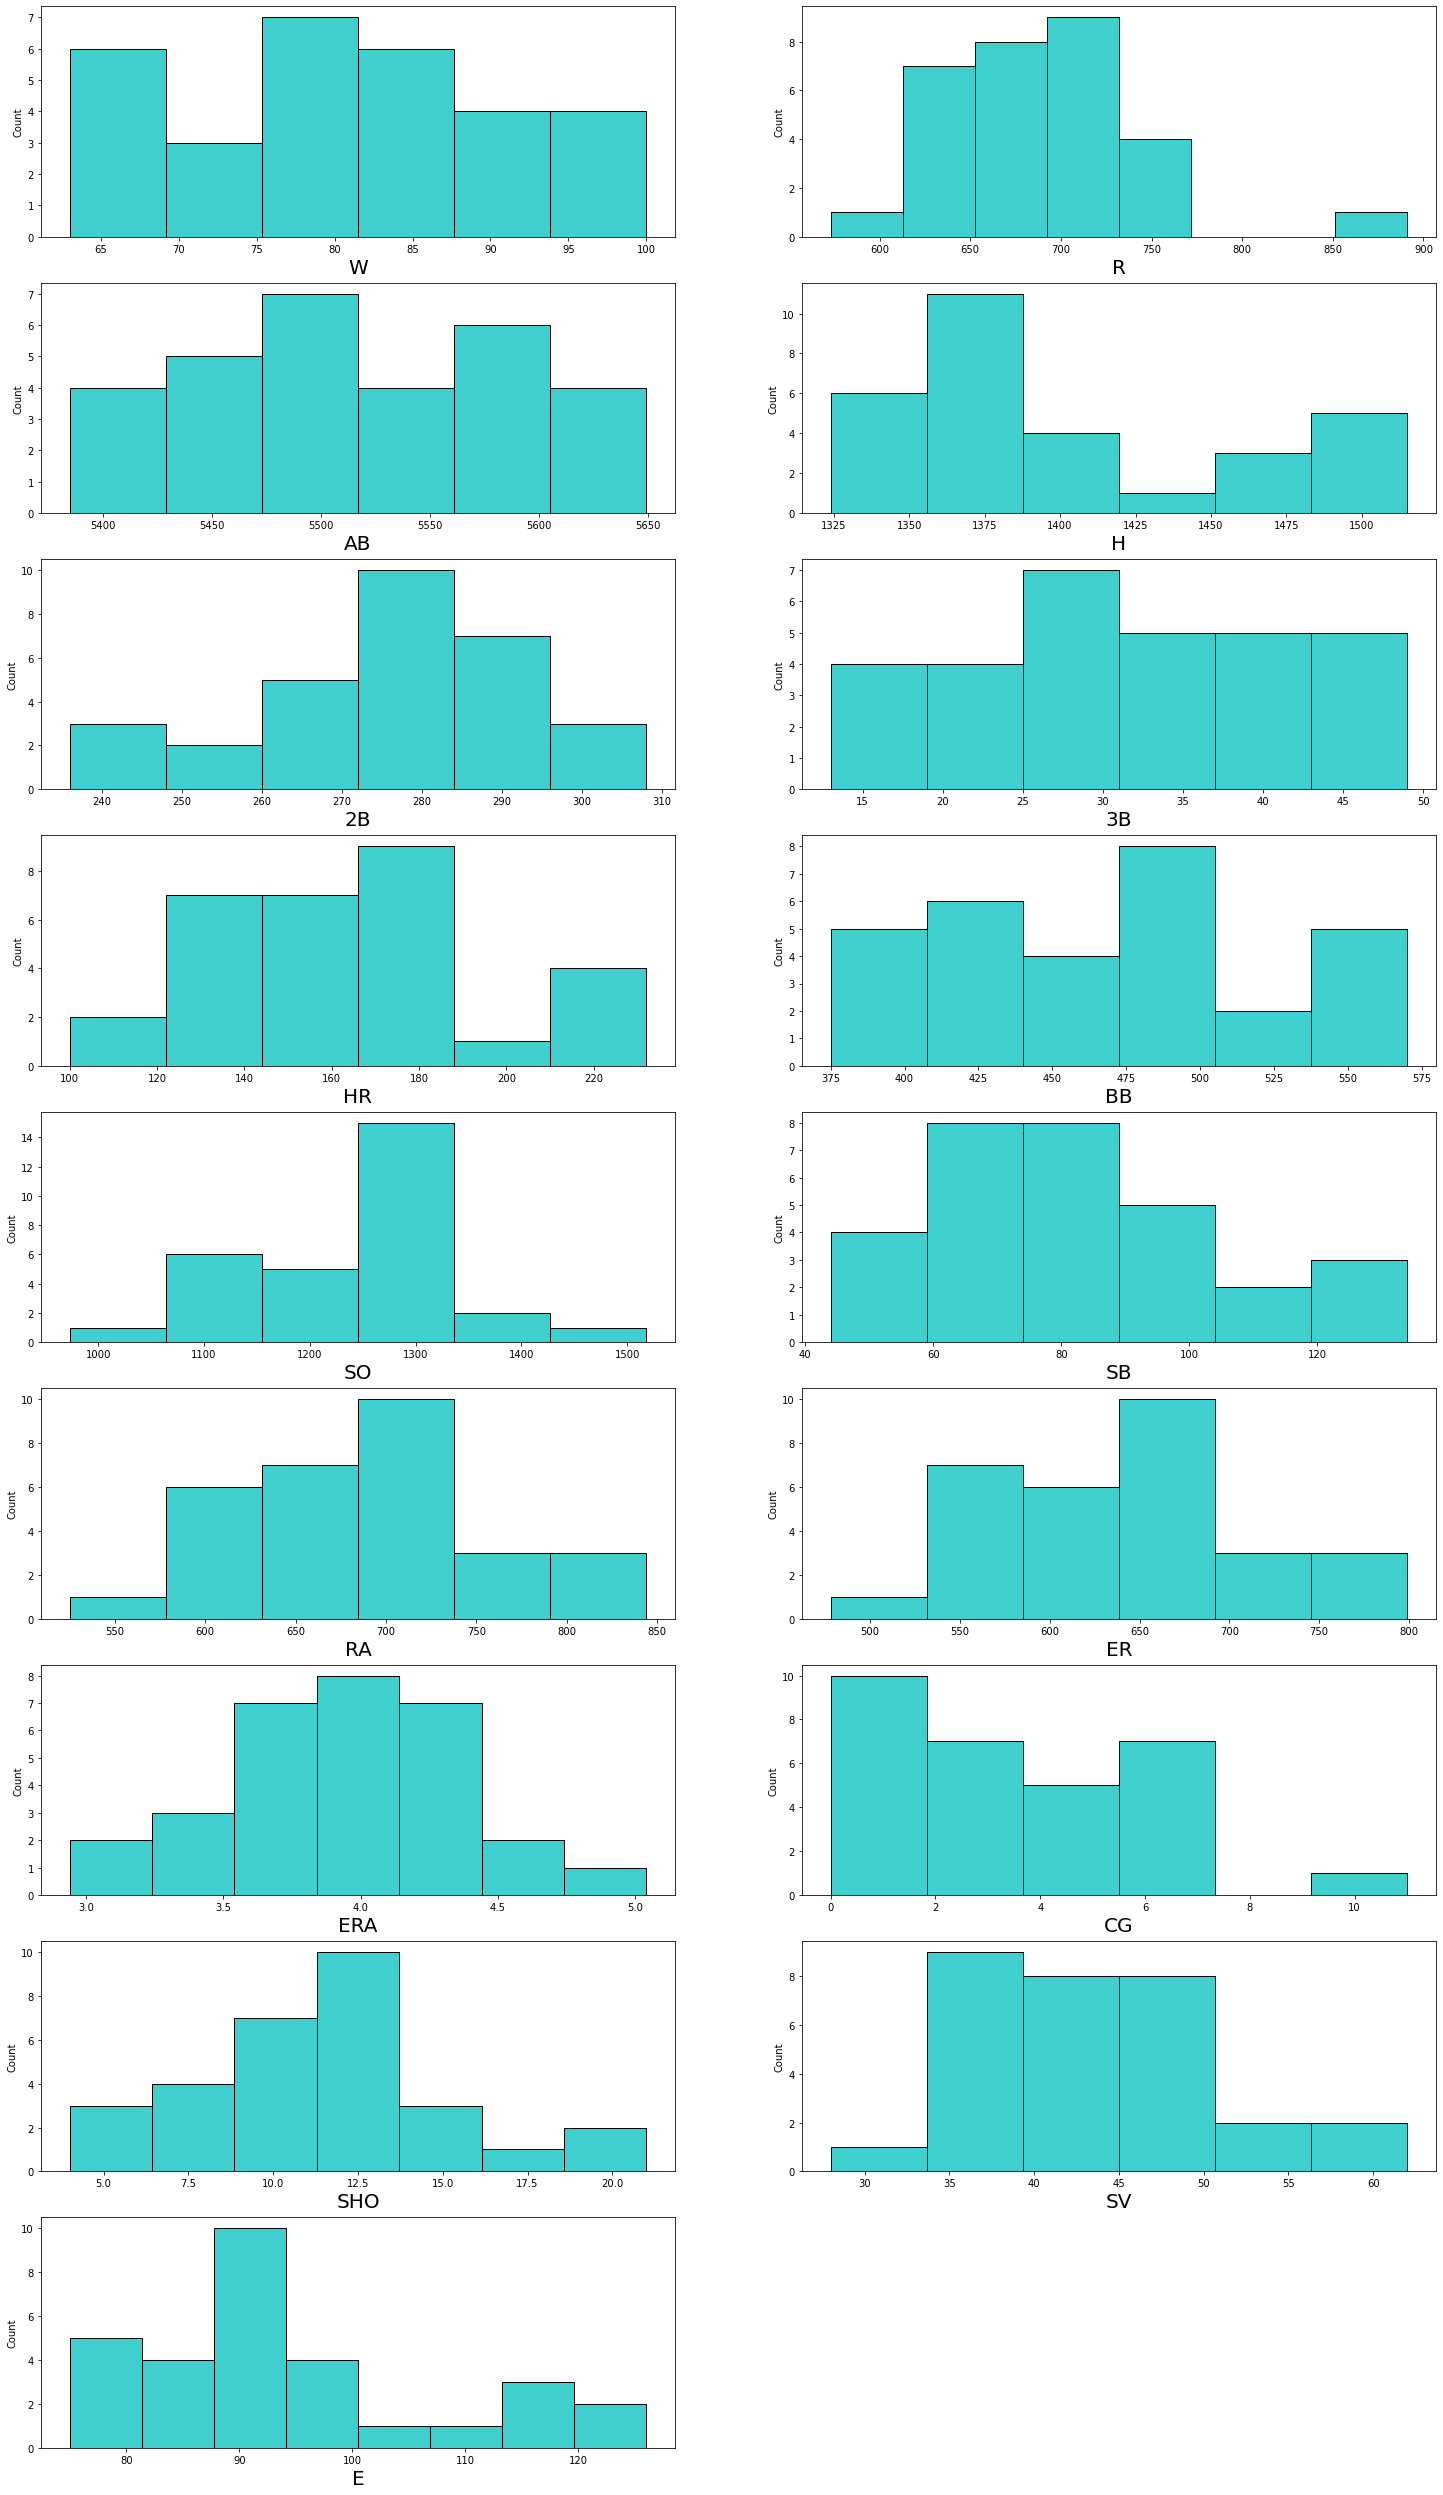

In [305]:
#Relationship Visualizing

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 20: # as we see there are eight columns in the data
        ax = plt.subplot(10,2,plotnumber)
        sn.histplot(df[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

#### 3. Boxplot

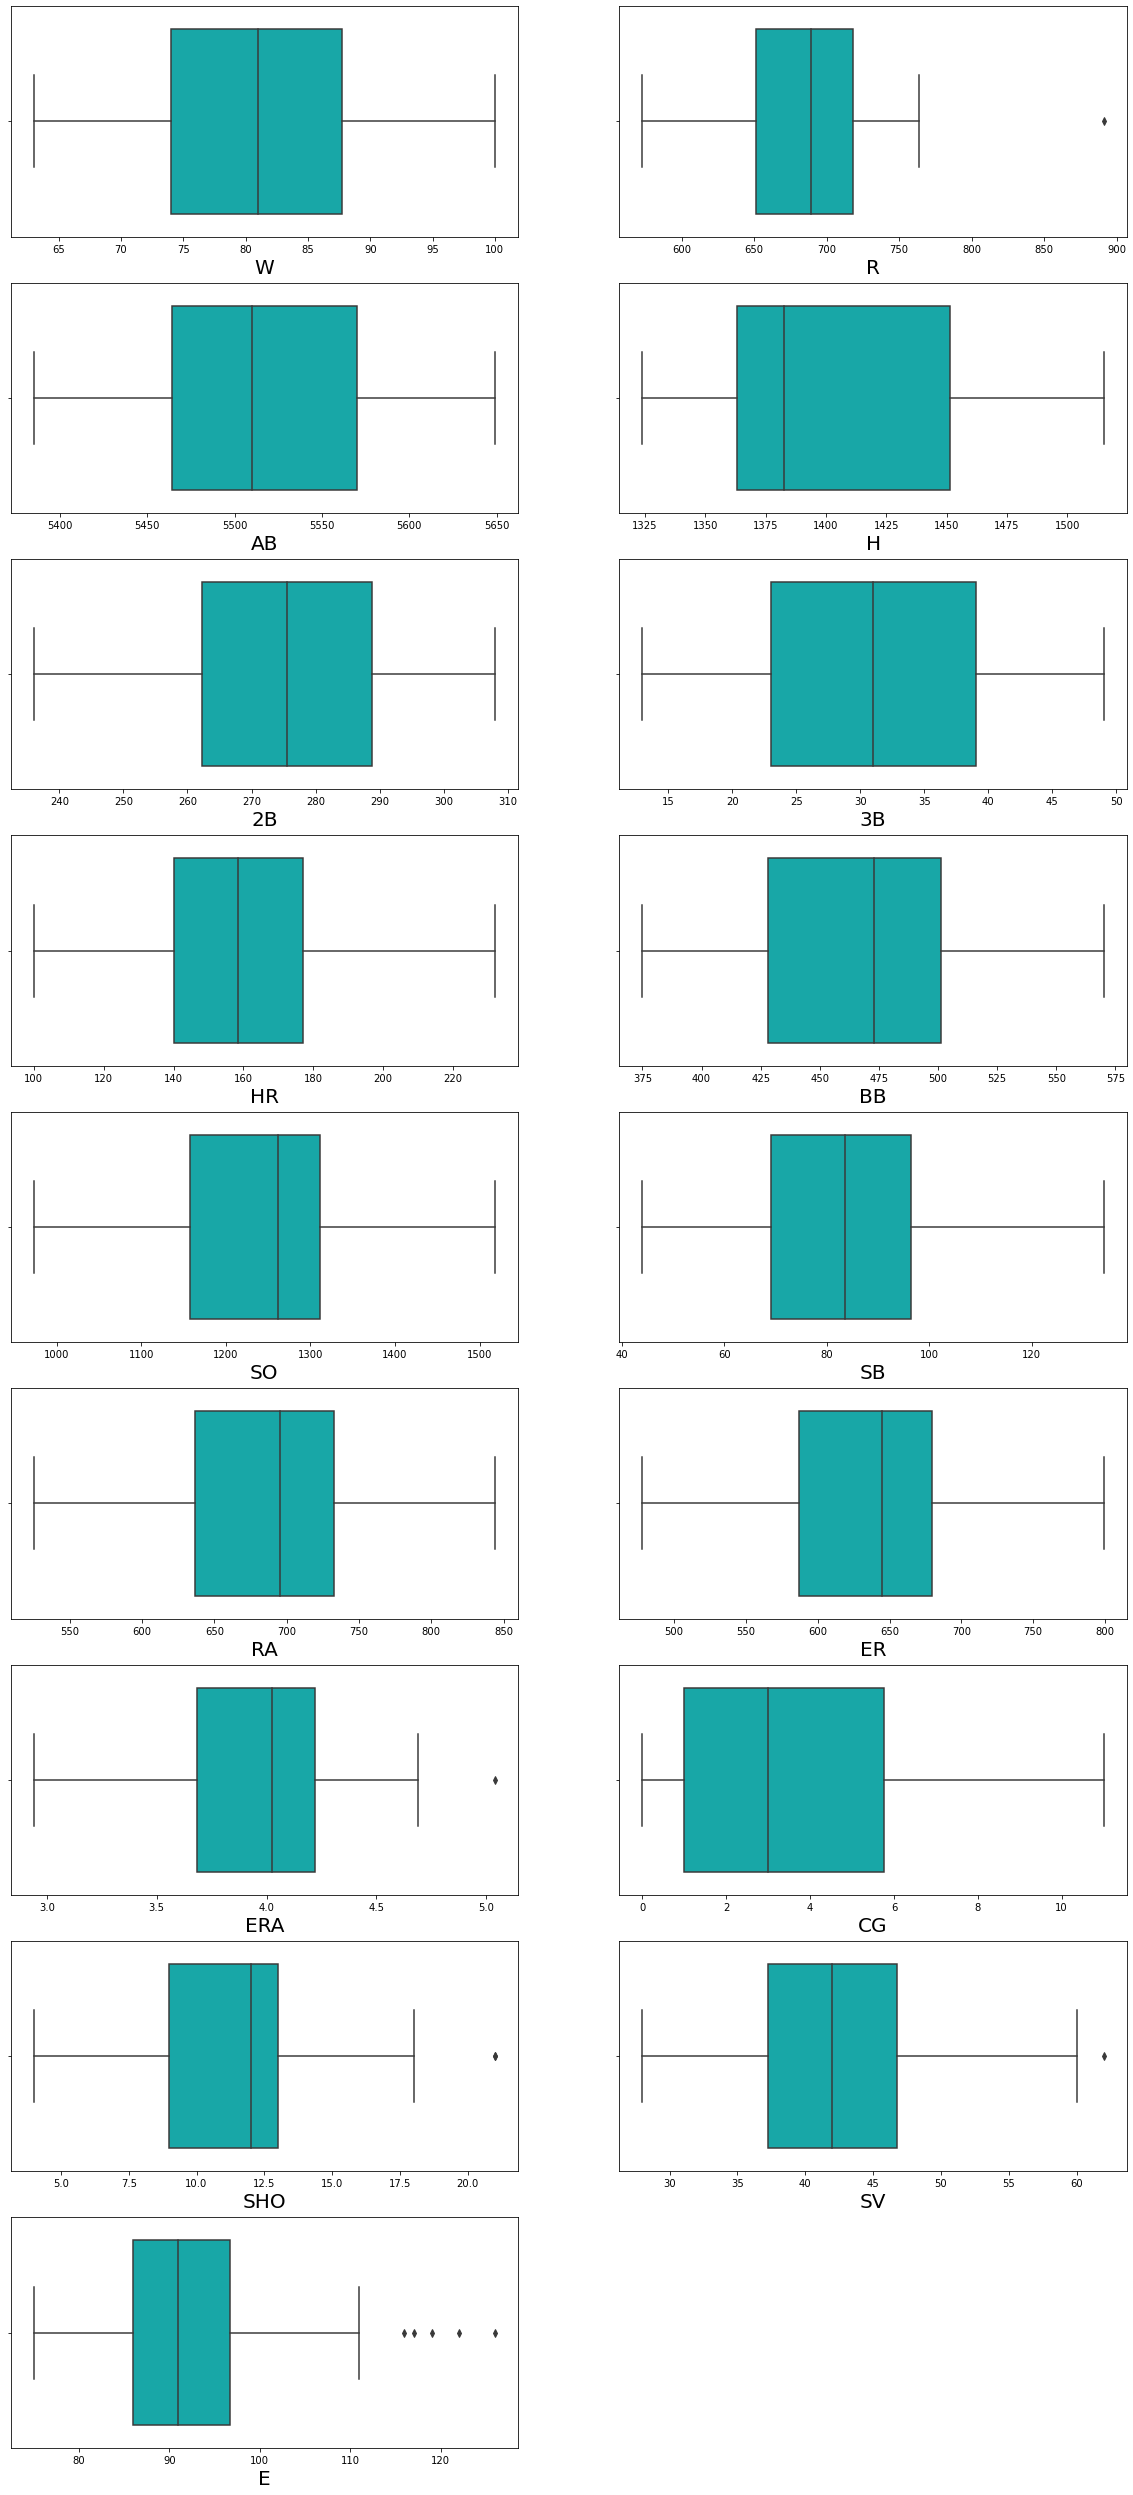

In [306]:
#Relationship Visualizing

plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 20: # as we see there are eight columns in the data
        ax = plt.subplot(10,2,plotnumber)
        sn.boxplot(df[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in boxplot R, ERA, SHO, SV and E input variable is having outliers in it. So, we need remove outliers from that the input variables.

## Bi variate analysis
Bi variate analysis is works with two variables.

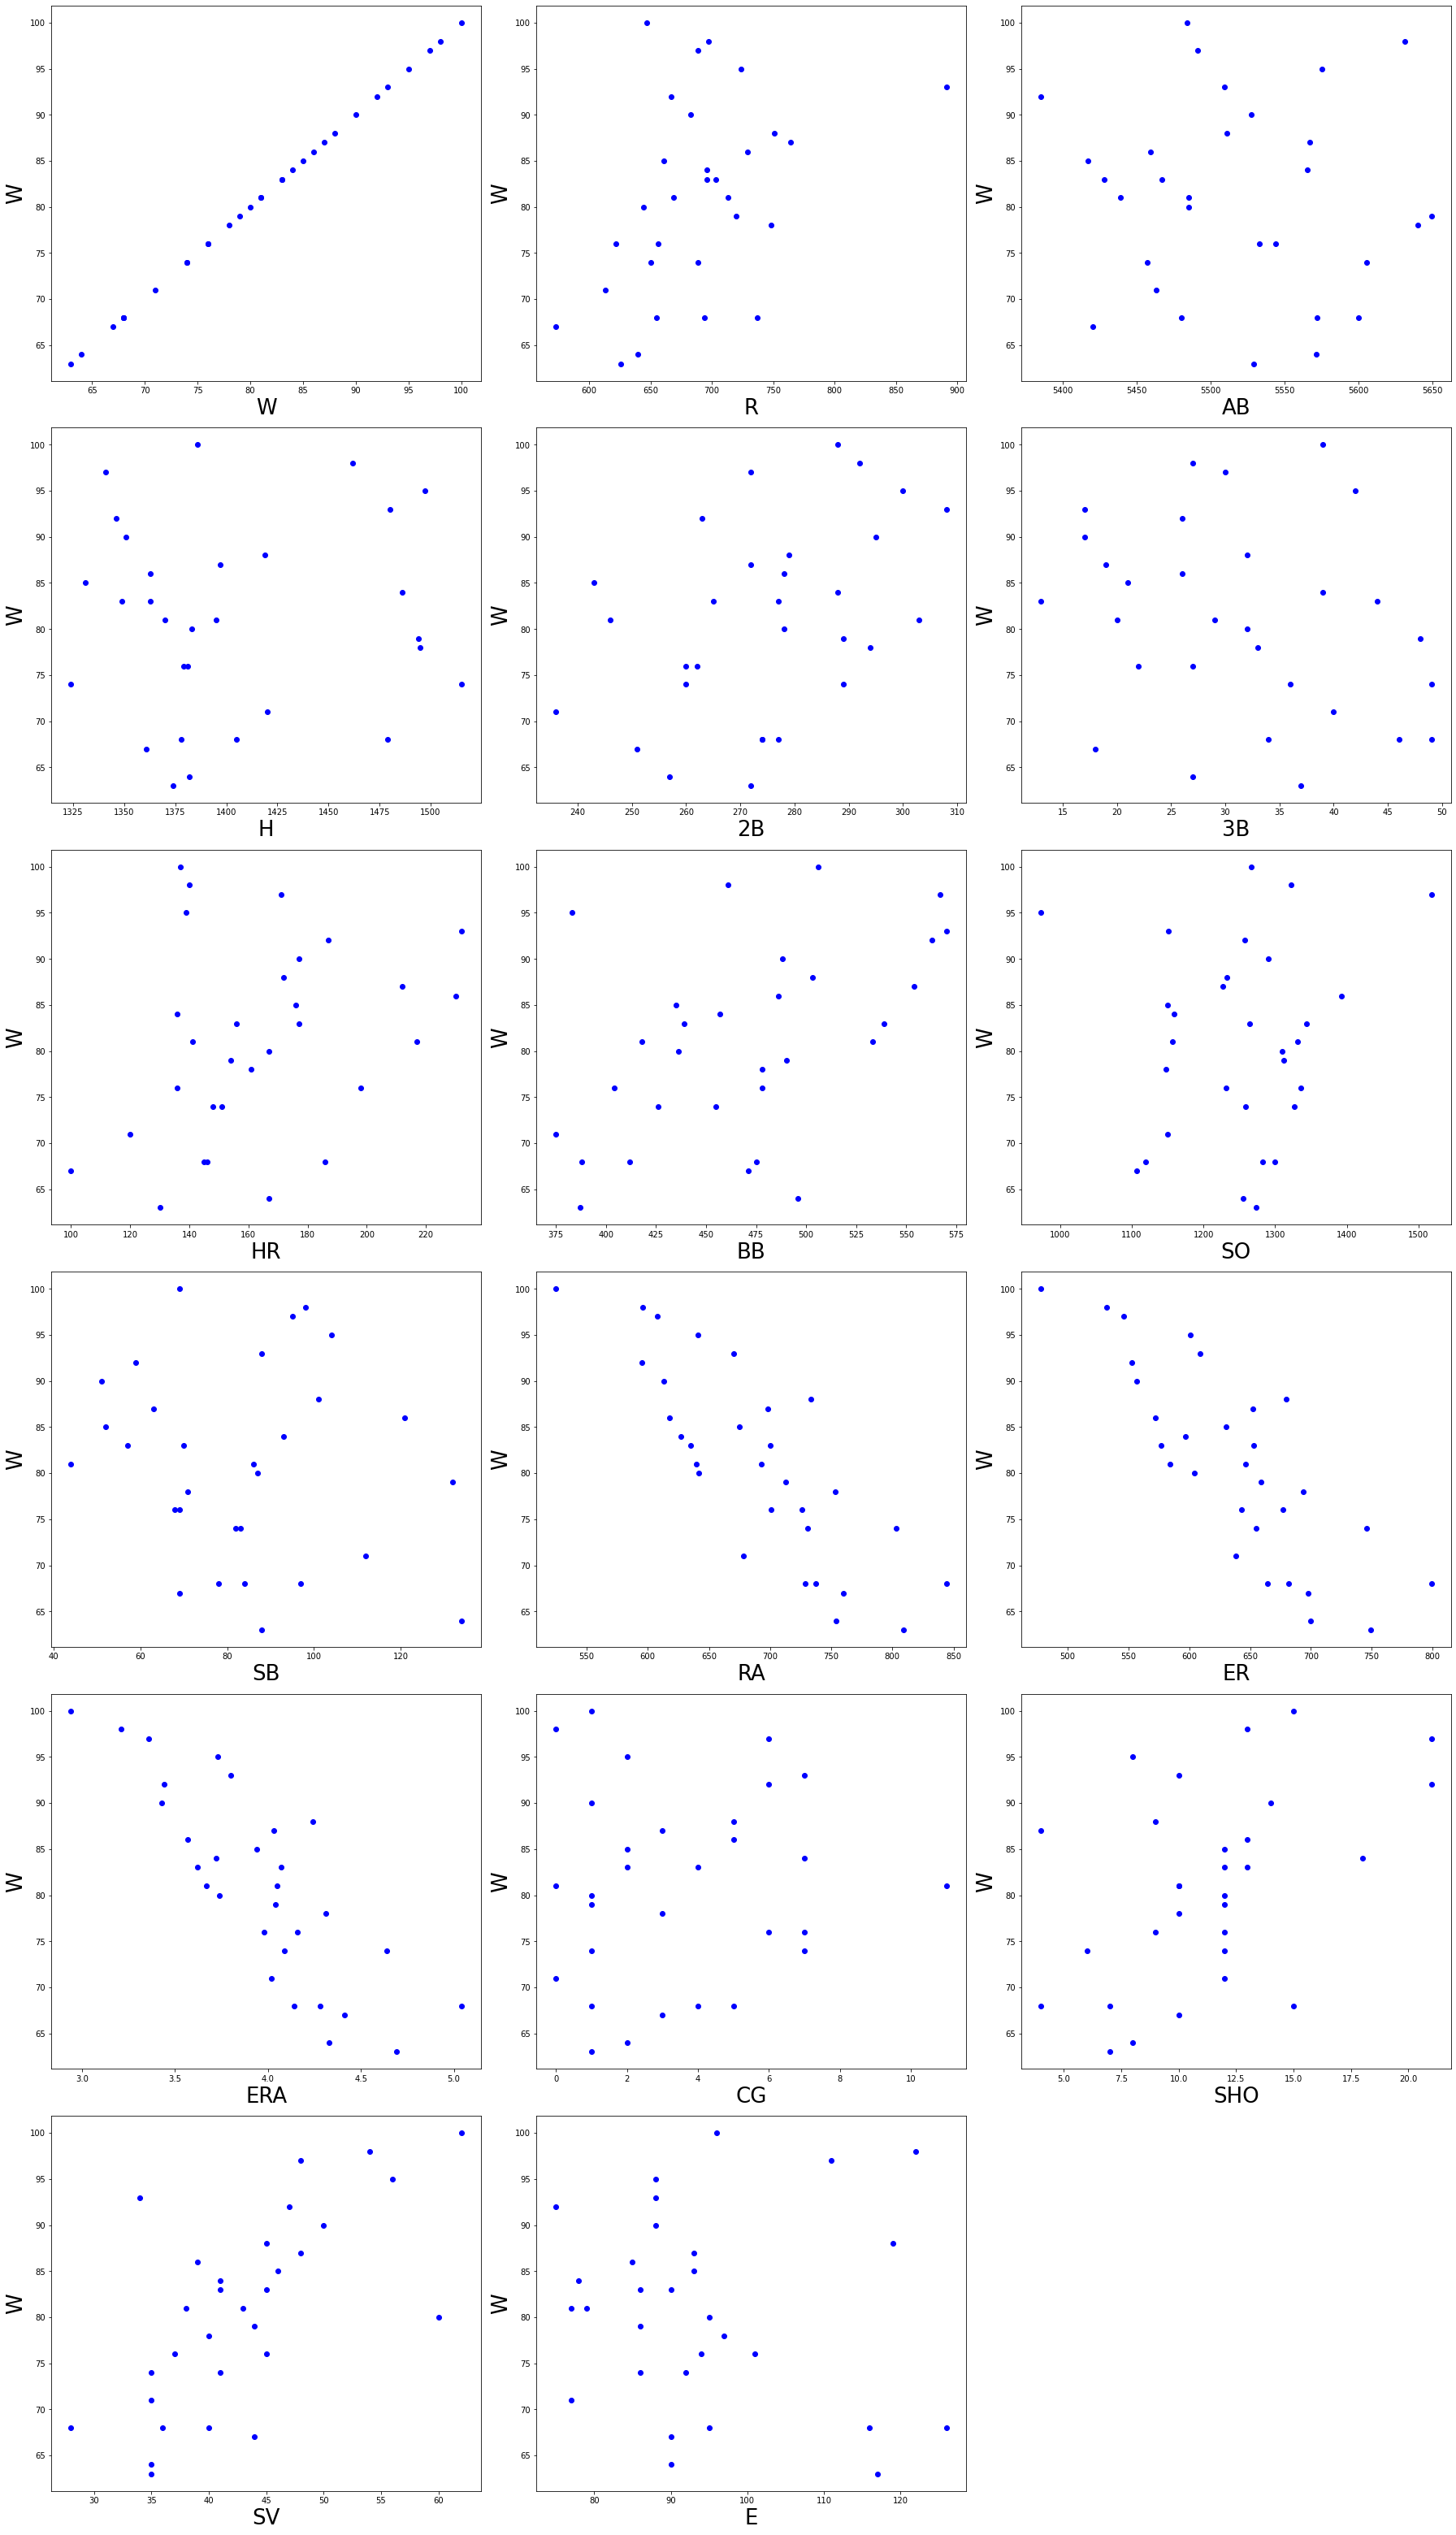

In [307]:
#Relationship Visualizing

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 20:
        ax = plt.subplot(7,3,plotnumber)
        plt.scatter(df[column],df['W'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()

as we have seen in plot SV, ERA, SHO and R is having almost linear relationship with target variable and other variables are having non linear realationship with target variable(sales). 
and outliers are also present in some column.

# Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

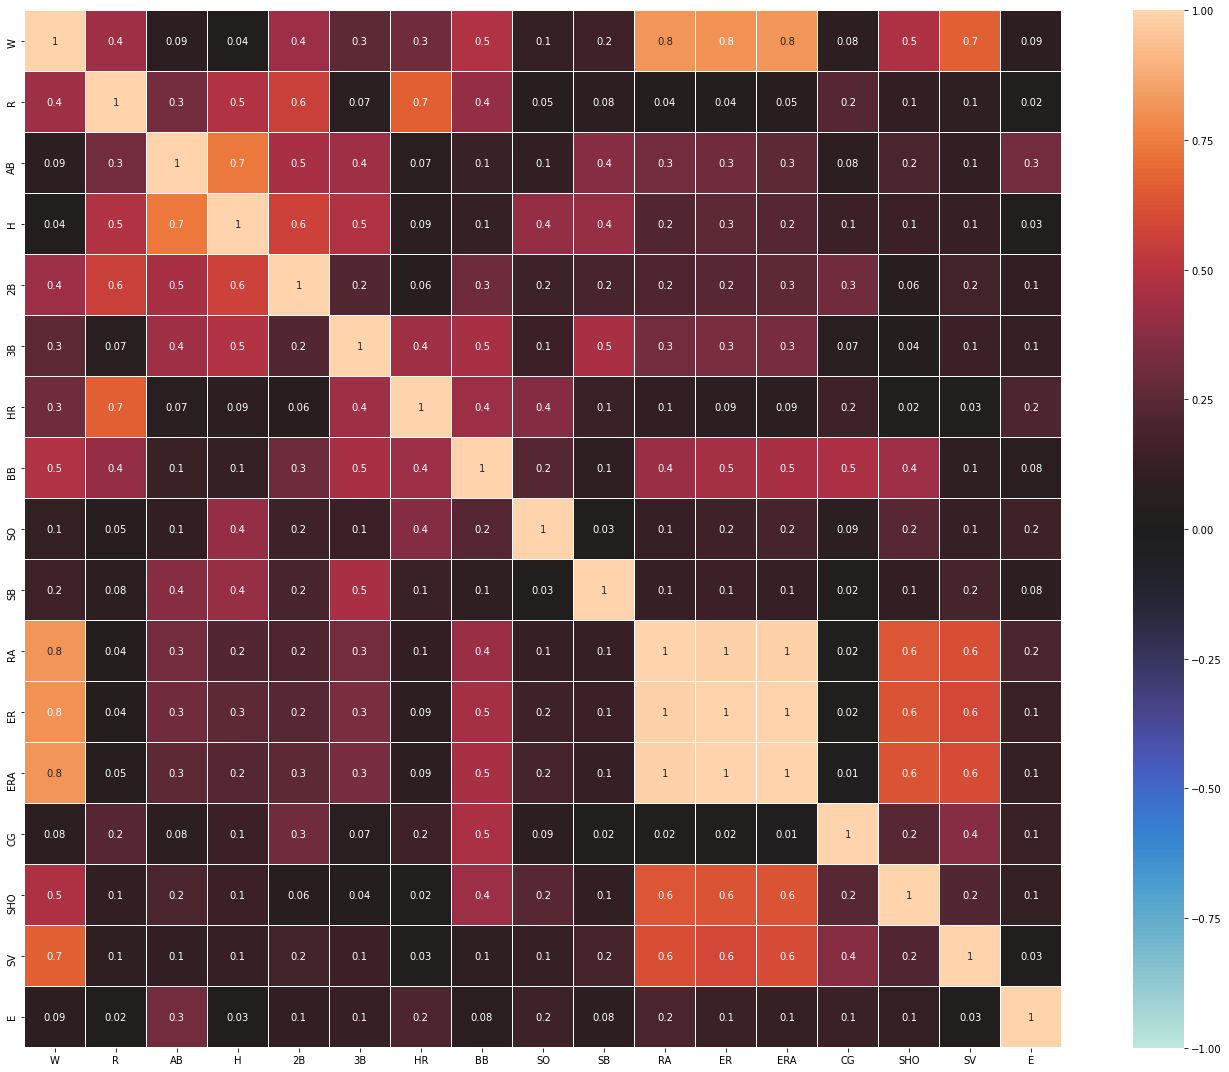

In [308]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in heatmap RA, ER and ERA are strongly correlated with W(targate variable) and H column is weekly correlate with targate variable.

##### Find out which columns are positively and negatively correlated with each other

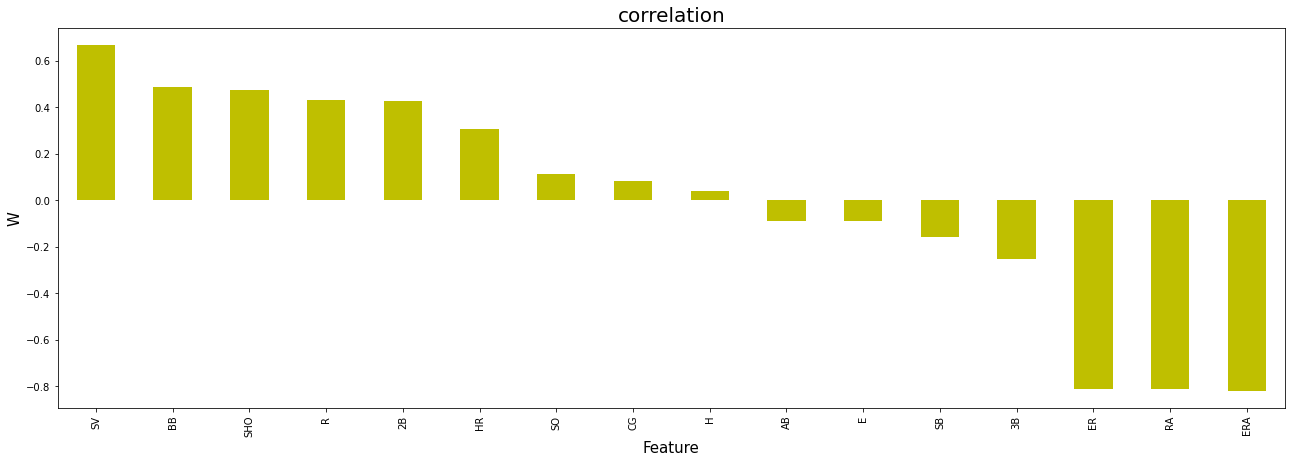

In [309]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('W', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

H column is weekly correlate with targate variable.

#### After visualization we conclude that all input variable are having linear/nonlinear relationship with target variable.

In [310]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


## Drop Column

as we can see H feature is weekly correlated with target variable so we can drop that column.

In [311]:
df['H'].unique()

array([1497, 1349, 1395, 1381, 1515, 1480, 1397, 1370, 1383, 1495, 1419,
       1363, 1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420,
       1361, 1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

In [312]:
df['H'].value_counts()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.

1363    2
1341    1
1497    1
1405    1
1349    1
1351    1
1480    1
1479    1
1419    1
1420    1
1486    1
1361    1
1494    1
1495    1
1370    1
1462    1
1374    1
1378    1
1379    1
1381    1
1382    1
1383    1
1386    1
1515    1
1324    1
1331    1
1395    1
1397    1
1346    1
Name: H, dtype: int64

In [314]:
df=df.drop(['H'], axis=1)

In [315]:
df.describe()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


H column is having poorly correlated with tagret variable. So, drop that column.

Dataframe after droping H column.

## Remove outliers 
As we see outliers present in some columns. So, remove outliers first.

### 1. Outlier remove using zscore technique

In [316]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[[ 'R', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']]) #Put contineuos/float input variable in z-score 
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df = df[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before and after
shape before         : (30, 16)
shape after          : (29, 16)
Percentage Loss      : 0.03333333333333333


In [317]:
(29/30)*100

96.66666666666667

##### 3.333% data loss after using zscore technique
##### 96.667% data remains 
##### Now  we will check how much data lost in IQR technique, use IQR method

## 2. Outlier Removing using IQR
### from boxplot in EDA, we came to know that outliers present in following columns.
#### Visualize data again to check outliers are present at low side or high side

In [264]:
df2 = df

In [265]:
fe = df2[['R', 'ERA', 'SHO', 'SV', 'E']]

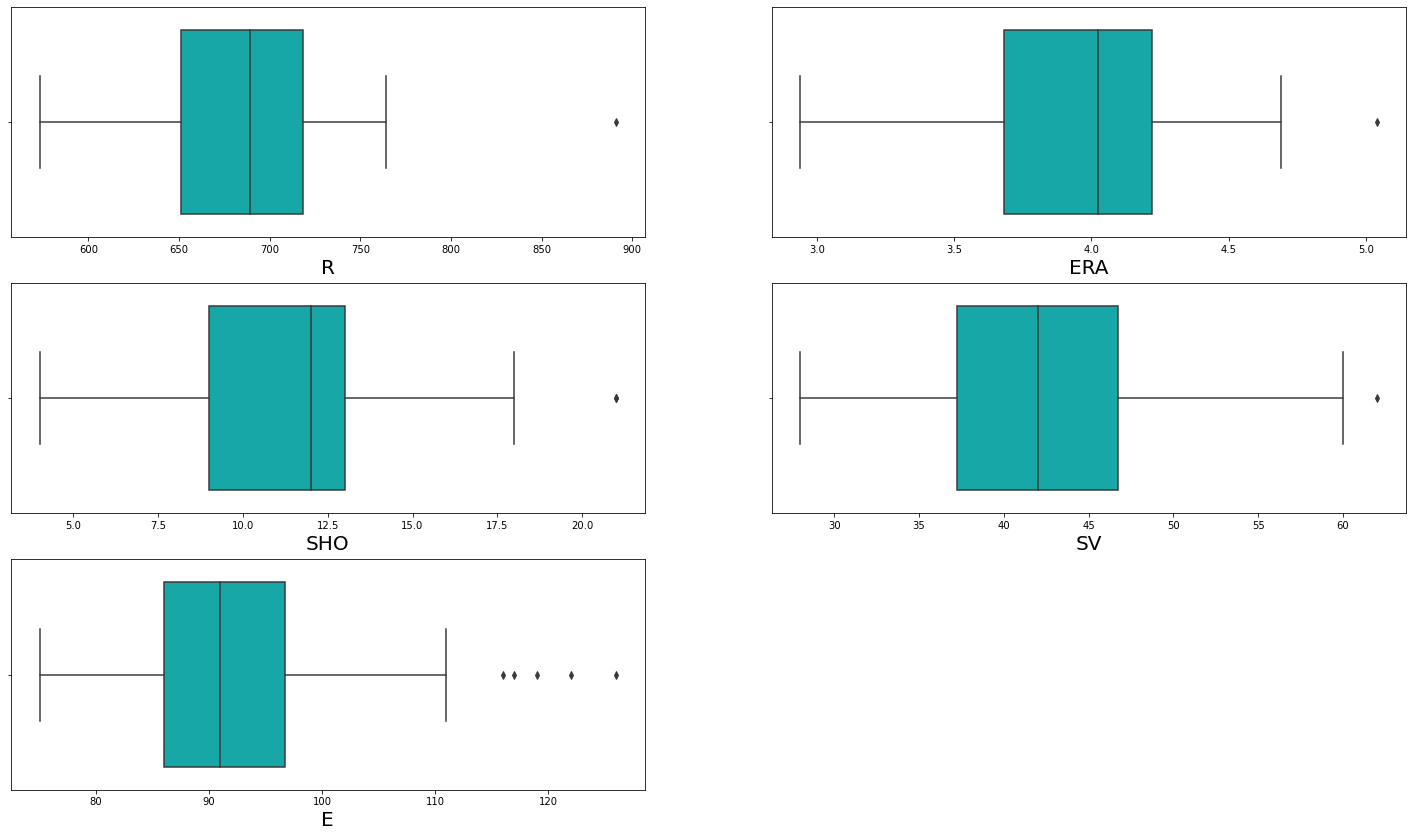

In [266]:
#Relationship Visualizing

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 20: # as we see there are eight columns in the data
        ax = plt.subplot(10,2,plotnumber)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in plot outliers is present in all above columns, so remove it first.

In [267]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = df2.quantile(0.25)

#3rd quantile 75%
q3 = df2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [268]:
df2.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Outlier detection formula 
#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR)
as outliers present in higher side and lower side, so we will go with above formulas

In [269]:
#as shown in boxplot we have outlier in higher side of R
#Remove outliers from higher side so, use higher side formula

R_out = (q3.R + (1.5*(iqr.R)))
R_out

818.75

In [270]:
index_out = np.where(df2['R'] > R_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


after removing outliers in R 29 rowss wil remain.

In [271]:
#as shown in boxplot we have outlier in higher side of ERA
#Remove outliers from higher side so, use higher side formula

ERA_out = (q3.ERA + (1.5*(iqr.ERA)))
ERA_out

5.026250000000001

In [272]:
index_out = np.where(df2['ERA'] > ERA_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


after removing outliers in ERA 28 rowss wil remain.

In [273]:
#as shown in boxplot we have outlier in higher side of SHO
#Remove outliers from higher side so, use higher side formula

SHO_out = (q3.SHO + (1.5*(iqr.SHO)))
SHO_out

19.0

In [274]:
index_out = np.where(df2['SHO'] > SHO_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


After removing outliers in SHO 26 rowss wil remain.

In [275]:
#as shown in boxplot we have outlier in higher side of SV
#Remove outliers from higher side so, use higher side formula

SV_out = (q3.SV + (1.5*(iqr.SV)))
SV_out

61.0

In [276]:
index_out = np.where(df2['SV'] > SV_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


After removing outliers in SV 25 rowss wil remain.

In [277]:
#as shown in boxplot we have outlier in higher side of E
#Remove outliers from higher side so, use higher side formula

E_out = (q3.E + (1.5*(iqr.E)))
E_out

112.875

In [278]:
index_out = np.where(df2['E'] > E_out)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


After removing outliers in E column 20 rows wil remain in dataframe.

In [279]:
(30-20)/30 *100

33.33333333333333

In [280]:
20/30 *100

66.66666666666666

In [281]:
print("Data loss in IQR method is: 33.33%")
print("66.66% data remains in after applying it.")

Data loss in IQR method is: 33.33%
66.66% data remains in after applying it.


###### As if we compare in both the techniques 33.33 % data lost in IQR moethod. Now we will go with Zscore technique..

## Check the skewness and remove that

In [318]:
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

As we see there are some variable is skewed, whoes value is not lies between -0.5 to +0.5 this range.
1. CG
2. SV
3. E

### Apply Log transformation/Powertransformation to remove skewness
In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [320]:
#applying log transformation on skewed columns

new_df['CG'] = np.log1p(new_df['CG'])
new_df['SV'] = np.log1p(new_df['SV'])
new_df['E'] = np.log1p(new_df['E'])

In [321]:
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

#### after using log transformation we can see the skewness of maximum columns get reduced.

<AxesSubplot:xlabel='CG', ylabel='Density'>

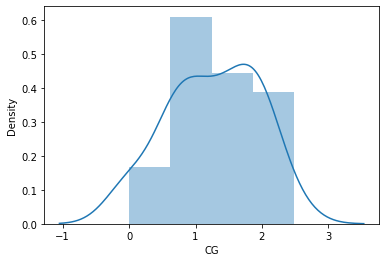

In [323]:
sn.distplot(new_df['CG'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

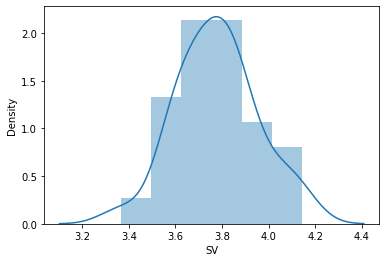

In [324]:
sn.distplot(new_df['SV'])

<AxesSubplot:xlabel='E', ylabel='Density'>

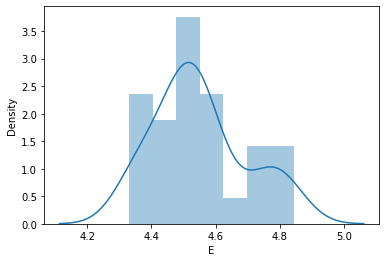

In [325]:
sn.distplot(new_df['E'])

As shown in plot skewness removes after using power transformation skewness removal.

## Seperating the columns into featuers and target:
#### x= features, y=Target 

In [326]:
x = new_df.drop(columns = 'W', axis=1)
y = new_df['W']

## Scalling technique

In [327]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [328]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,6.187025,R
1,10.948475,AB
2,3.592723,2B
3,3.304385,3B
4,7.292619,HR
5,3.421530,BB
6,2.881245,SO
7,1.818756,SB
8,192.865858,RA
9,1850.780212,ER


as we have saw in the table vif value is greater than 5 for many columns, so drop maximum value column to avoid multiclinearity issue.

In [329]:
new_df=new_df.drop(['ER'], axis=1)

In [330]:
x = new_df.drop(columns = 'W', axis=1)
y = new_df['W']

In [331]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [332]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,4.506610,R
1,3.375405,AB
2,3.314755,2B
3,3.195894,3B
4,5.201720,HR
5,3.409289,BB
6,2.852809,SO
7,1.730536,SB
8,124.690993,RA
9,117.273547,ERA


In [340]:
x = new_df.drop(columns = 'W', axis=1)
y = new_df['W']

In [341]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [342]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,4.506610,R
1,3.375405,AB
2,3.314755,2B
3,3.195894,3B
4,5.201720,HR
5,3.409289,BB
6,2.852809,SO
7,1.730536,SB
8,124.690993,RA
9,117.273547,ERA


as we have saw in the table vif value is not greater than 10 for columns, so we can proceed further now.

In [344]:
new_df=new_df.drop(['RA'], axis=1)

KeyError: "['RA'] not found in axis"

In [345]:
x = new_df.drop(columns = 'W', axis=1)
y = new_df['W']

In [346]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [347]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,4.350226,R
1,2.442292,AB
2,3.312614,2B
3,3.179374,3B
4,4.880687,HR
5,2.844209,BB
6,2.237690,SO
7,1.588462,SB
8,4.533057,ERA
9,2.384124,CG


## Finding best random state

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [349]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.7687188019966722 on Random_state  1


In [350]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 1)

## 1.Linear Regression Model

In [351]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [352]:
pred_test=Lr.predict(x_test)

In [353]:
print(r2_score(y_test,pred_test))

0.7698982353048001


## Cross Validation of Linear Regression 

In [354]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.39110605170974067

## Regularization

In [355]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [356]:
ls = Lasso(alpha = 0.01, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.79048266974614

In [357]:
cv_score= cross_val_score(ls, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4108818734851612

###### The r2 score for linear regression model is : 89.20%
###### Cross validation score for linear regression is : 88.53%

In [358]:
#calculate the differece between r2 score and cross validation score 
89.20-88.53

0.6700000000000017

# 2.Random Forest Regression

In [359]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [360]:
Rfr =RandomForestRegressor(criterion = "mse", max_features="auto")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  70.94405727923629
Cross Val Score:  -28.821481479817834


###### The r2 score for Random Forest Regressor model is : 97.88%
###### Cross validation score for Random Forest Regressor is : 97.44%

In [361]:
#calculate the differece between r2 score and cross validation score 
97.88-97.44

0.4399999999999977

## 3.Support Vector Regression

In [362]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [363]:
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))

0.08649174854224273


In [364]:
cv_score= cross_val_score(svr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.4311880664883687

##### The r2 score for SVR model is : 86.19%
##### Cross validation score for SVR is : 84.15%

In [365]:
#calculate the differece between r2 score and cross validation score 
86.19-84.15

2.039999999999992

## 4.Decision Tree Regression

In [366]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [367]:
pred_dt = dt.predict(x_test)
print(r2_score(y_test,pred_dt))

0.5620525059665871


In [368]:
cv_score= cross_val_score(dt, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

-2.0303236102644218

##### The r2 score for Decision Tree Regression model is : 96.95%
##### Cross validation score for Decision Tree Regression is : 95.23%

In [369]:
#calculate the differece between r2 score and cross validation score 
96.95-95.23

1.7199999999999989

## Compare all models

###### The diffrence between r2 score and cross validation score of linear regression model is : 0.67%
###### The diffrence between r2 score and cross validation score of Random Forest Regressor model is : 0.439%
###### The diffrence between r2 score and cross validation score of SVR model is : 2.04%
###### The diffrence between r2 score and cross validation score of Decision Tree Regression model is : 1.71%

### So, after comparison we conclude that the best model is Random Forest Regressor. Proceed further with that,

# Hyper parameter tunning

In [ ]:
#Random forest Regression
# see all the parameters of random forest Regressor
Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['mse', 'mae']}

In [ ]:
GCV=GridSearchCV(RandomForestRegressor(),Parameters,cv=5)

In [ ]:
GCV.fit(x_train, y_train) 
#fit the all parameters in grid search cv and see the output

In [ ]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

In [ ]:
mod = RandomForestRegressor( criterion='mae', max_depth=8 , max_features='auto', n_estimators=700)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

### after hyper parameter tunning the r2 score raise : 98.02%

# Saving the model

In [ ]:
import joblib
joblib.dump(mod,"AdvertisingSalesChannelPrediction.pkl")

### Loding model

In [ ]:
model = joblib.load("AdvertisingSalesChannelPrediction.pkl")

In [ ]:
prediction = model.predict(x_test)

In [ ]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [ ]:
prediction.to_csv('Results.csv', index = False)
#prediction saving

model saved